# Zadanie

Celem zadania jest wykonanie wielomianu interpolacyjnego różnymi sposobami dla zestawu danych reprezentującego zmianę populacji USA w latach 1900 - 1980 w odstępach co 10 lat.

Wielomiany współczynniki wielomianów interpolacyjnych wylicza się z równania $(1)$: $$Ax=y$$
gdzie $A$ to macierz Vandermonde'a dla zadanych funkcji bazowych, a $y$ to odcięte węzłów interpolacji.

## Przygotowanie danych

### Biblioteki

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- `pandas` - biblioteka wykorzystana do przetwarzania danych
- `numpy` - biblioteka wykorzystana do obliczeń
- `matplotlib.pyplot` - biblioteka wykorzystana do sporządzenia wykresów

In [2]:
data = np.array([[1900, 76_212_168],
                 [1910, 92_228_496],
                 [1920, 106_021_537],
                 [1930, 123_202_624],
                 [1940, 132_164_569],
                 [1950, 151_325_798],
                 [1960, 179_323_175],
                 [1970, 203_302_031],
                 [1980, 226_542_199]
                ], dtype=np.int64)
df = pd.DataFrame(data, columns=["year","population"])
df

,year,population
0,1900,76212168
1,1910,92228496
2,1920,106021537
3,1930,123202624
4,1940,132164569
5,1950,151325798
6,1960,179323175
7,1970,203302031
8,1980,226542199


**Tab. 1** - populacja USA w zależności od roku

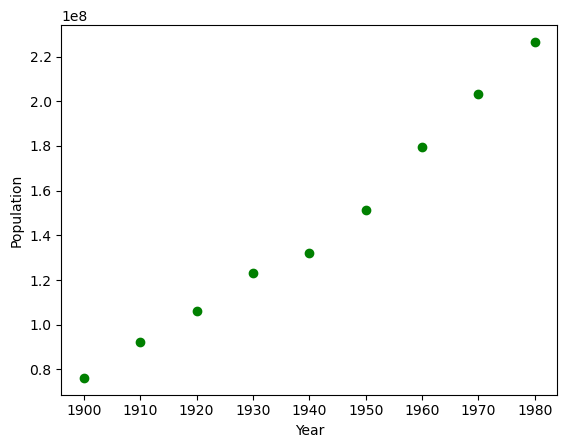

In [3]:
plt.xlabel("Year") 
plt.ylabel("Population")
plt.scatter(df["year"], df["population"], color ="green")
plt.show()

**Wyk. 1** - wykres punktowy przedstawiający dane z **Tab. 1**

In [4]:
points = df["year"]
annual_points = np.linspace(1900, 1990, num=91).astype(int)
y = df["population"]

## Bazy jednomianowe

In [5]:
def gen_base_1(j):
    return lambda t: t ** (j-1)

def gen_base_2(j):
    return lambda t: (t - 1900) ** (j-1)

def gen_base_3(j):
    return lambda t: (t - 1940) ** (j-1)

def gen_base_4(j):
    return lambda t: ((t - 1940)/40) ** (j-1)

Funkcje generujące kolejne funkcje bazowe dla macierzy Vandermonde'a: $$\phi_j(t)=t^{j-1}$$ $$\phi_j(t)=(t-1900)^{j-1}$$ $$\phi_j(t)=(t-1940)^{j-1}$$ $$\phi_j(t)=\left(\frac{t-1940}{40}\right)^{j-1}$$

In [6]:
matrix_1 = np.zeros(shape=(9, 9))
for i in range(9):
    for j in range(9):
        matrix_1[i][j] = gen_base_1(j+1)(points[i])
matrix_1 = np.matrix(matrix_1)

In [7]:
matrix_2 = np.zeros(shape=(9, 9))
for i in range(9):
    for j in range(9):
        matrix_2[i][j] = gen_base_2(j+1)(points[i])
matrix_2 = np.matrix(matrix_2)

In [8]:
matrix_3 = np.zeros(shape=(9, 9))
for i in range(9):
    for j in range(9):
        matrix_3[i][j] = gen_base_3(j+1)(points[i])
matrix_3 = np.matrix(matrix_3)

In [9]:
matrix_4 = np.zeros(shape=(9, 9))
for i in range(9):
    for j in range(9):
        matrix_4[i][j] = gen_base_4(j+1)(points[i])
matrix_4 = np.matrix(matrix_4)

Macierze wygenerowane za pomocą kolejnych funkcji bazowych.

In [10]:
cond_1 = np.linalg.cond(matrix_1)
cond_2 = np.linalg.cond(matrix_2)
cond_3 = np.linalg.cond(matrix_3)
cond_4 = np.linalg.cond(matrix_4)
print("Condition numbers for matrices:")
print("Matrix 1:", cond_1)
print("Matrix 2:", cond_2)
print("Matrix 3:", cond_3)
print("Matrix 4:", cond_4)

Condition numbers for matrices:
Matrix 1: 1.1393798408458244e+26
Matrix 2: 6110183760727540.0
Matrix 3: 9315536046807.896
Matrix 4: 1605.4437004786923


Współczynniki uwarunkowania $\text{cond}(A)$ kolejnych macierzy.  
Najlepiej uwarunkowana macierz czwarta, zostanie wykorzystana do obliczeń.

In [11]:
coef_mono = np.linalg.solve(matrix_4, y)

Współczynniki wielomianu interpolacji $p(t)$ wyliczone z równania $(1)$.

In [12]:
def p_monomial(t, coef, degree=0):
    if degree == len(coef) - 2:
        return coef[degree] + coef[degree+1] * ((t-1940)/40)
    return coef[degree] + ((t-1940)/40) * p_monomial(t, coef, degree+1)

In [13]:
result = p_monomial(annual_points, coef_mono).tolist()
print("Population calculated from interpolation polynomial:")
print(*(f"{annual_points[i]}: {result[i]}" for i in range(len(annual_points))), sep="\n")

Population calculated from interpolation polynomial:
1900: 76212168.0
1901: 84044921.23697999
1902: 89046323.5252864
1903: 91959312.94110827
1904: 93393579.33850625
1905: 93842317.18527225
1906: 93697541.86011392
1907: 93264046.00757447
1908: 92772070.60800256
1909: 92388763.4807904
1910: 92228496.0
1911: 92362106.86240079
1912: 92825139.8088448
1913: 93625140.26080853
1914: 94748073.89483266
1915: 96163928.23849489
1916: 97831556.43245313
1917: 99702820.36399923
1918: 101726088.43846656
1919: 103849141.31573759
1920: 106021537.0
1921: 108196484.73180345
1922: 110332275.19237119
1923: 112393312.59102443
1924: 114350792.26747903
1925: 116183065.50167847
1926: 117875731.28472832
1927: 119421492.86540164
1928: 120819814.94758657
1929: 122076415.4749507
1930: 123202624.0
1931: 124214636.69561179
1932: 125132696.1280256
1933: 125980221.97117728
1934: 126782916.90316544
1935: 127567869.98654175
1936: 128362677.89501952
1937: 129194602.41009802
1938: 130089780.67200255
1939: 131072502.7302435

**Tab. 2** - Populacja w latach 1900 - 1990 wyliczona na podstawie wielomianu interpolacyjnego z bazami jednomianowymi

Punkty 1981 - 1990 są punktami ekstrapolowanymi, wyliczonymi jedynie na podstawie wielomianu interpolacyjnego.

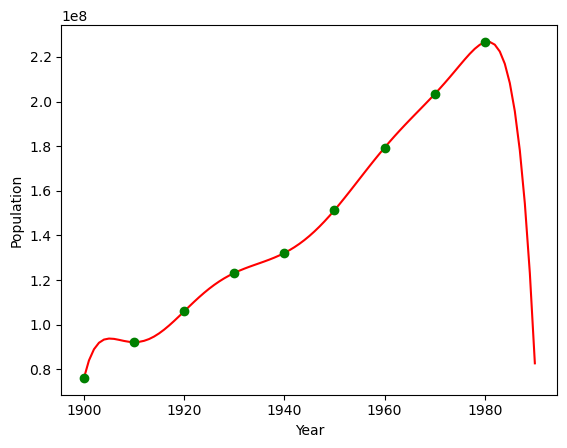

In [14]:
plt.xlabel("Year")
plt.ylabel("Population")
plt.plot(annual_points, result, color="red", zorder=1)
plt.scatter(points, df["population"], color="green", zorder=2)
plt.show()

**Wyk. 2** - wielomian interpolacyjny wyliczony na podstawie baz jednomianowych z zaznaczonymi węzłami interpolacji

### Ekstrapolacja populacji w 1990 na podstawie otrzymanego wielomianu interpolacyjnego

In [15]:
extrapolated_population = result[-1]
actual_population = 248_709_873
print("Extrapolated population in 1990:", extrapolated_population)
print("Actual population in 1990:", actual_population)

Extrapolated population in 1990: 82749141.00000338
Actual population in 1990: 248709873


In [16]:
relative_population_error = (abs(actual_population - extrapolated_population) / actual_population) * 100
print("Relative error of extrapolated population:", relative_population_error)

Relative error of extrapolated population: 66.72864651416415


Ekstrapolowana populacja w roku 1990 na podstawie wielomianu interpolacyjnego: $82749141$  
Rzeczywista populacja w roku 1990: $248709873$  
Błąd względny ekstrapolacji wynosi $63.73\%$

## Bazy Lagrange'a

In [17]:
def l(j, t):
    global points
    
    numerator = 1
    denominator = 1
    for k in range(len(points)):
        if j != k:
            numerator *= t - points[k]
            denominator *= points[j] - points[k]
    return numerator/denominator

def p_lagrange(t):
    global y
    
    res = 0
    for j in range(len(y)):
        res += y[j] * l(j, t)
    return res

Funkcje obliczające funkcje bazowe Lagrange'a $\ell_j(t)$ oraz wielomian interpolacyjny $p(t)$.

$$\ell_j(t)=\prod_{k=1,k\not=j}^{n}\frac{t-t_k}{t_j-t_k}$$
$$p(t)=\sum_{j=1}^{n}y_j\ell_j(t)$$

In [18]:
result = [p_lagrange(annual_points[i]) for i in range(len(annual_points))]
print("Population calculated from interpolation polynomial:")
print(*(f"{annual_points[i]}: {result[i]}" for i in range(len(annual_points))), sep="\n")

Population calculated from interpolation polynomial:
1900: 76212168.0
1901: 84044921.23698002
1902: 89046323.52528639
1903: 91959312.94110835
1904: 93393579.33850625
1905: 93842317.18527222
1906: 93697541.86011393
1907: 93264046.00757451
1908: 92772070.60800256
1909: 92388763.48079039
1910: 92228496.0
1911: 92362106.86240074
1912: 92825139.8088448
1913: 93625140.2608085
1914: 94748073.89483266
1915: 96163928.23849487
1916: 97831556.43245313
1917: 99702820.36399923
1918: 101726088.43846653
1919: 103849141.31573759
1920: 106021537.0
1921: 108196484.73180343
1922: 110332275.1923712
1923: 112393312.59102443
1924: 114350792.26747905
1925: 116183065.50167847
1926: 117875731.2847283
1927: 119421492.86540164
1928: 120819814.94758655
1929: 122076415.47495069
1930: 123202624.0
1931: 124214636.69561177
1932: 125132696.12802559
1933: 125980221.97117728
1934: 126782916.90316544
1935: 127567869.98654175
1936: 128362677.8950195
1937: 129194602.410098
1938: 130089780.67200254
1939: 131072502.73024352


**Tab. 3** - Populacja w latach 1900 - 1990 wyliczona na podstawie wielomianu interpolacyjnego z bazami Lagrange'a

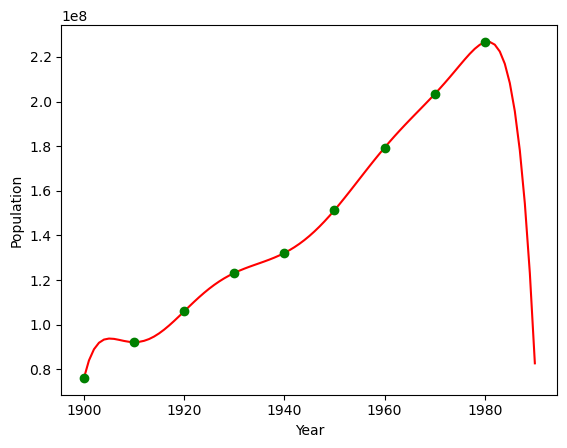

In [19]:
plt.xlabel("Year")
plt.ylabel("Population")
plt.plot(annual_points, result, color="red", zorder=1)
plt.scatter(points, y, color="green", zorder=2)
plt.show()

**Wyk. 3** - wielomian interpolacyjny wyliczony na podstawie baz Lagrange'a z zaznaczonymi węzłami interpolacji

## Interpolacja Newtona

In [20]:
from functools import cache

@cache
def pi(j, t):
    global points
    
    if j == 1:
        return t - points[j-1]
    if j < 1:
        return 1
    return (t - points[j-1]) * pi(j-1, t)

Funkcja wyliczająca $\pi_j(t)$. Dzięki wykorzystaniu adnotacji `@cache` z biblioteki `functools` każda wartość wyliczana jest tylko raz, więc wyliczenie wszystkich $\pi_j$ działa w czasie $O(n)$. Wzór rekurencyjny wykorzystany do ewaluacji:
$$\pi_j(t) = (t-t_{j-1})\cdot\pi_{j-1}(t)$$
$$\pi_1(t)=1$$

In [21]:
A = np.zeros(shape=(len(points), len(points)))
for i in range(len(points)):
    for j in range(i+1):
        A[i][j] = pi(j, points[i])

Tworzenie macierzy trójkątnej dolnej $A$.

In [22]:
coef_newton = np.linalg.solve(A, y)

Wyliczenie współczynników wielomianiu interpolacyjnego ze wzoru $(1)$.

In [23]:
def p_newton(t):
    global coef_newton
    
    res = 0
    for j in range(len(y)):
        res += pi(j, t) * coef_newton[j]
    return res

Wielomian interpolacyjny $p(t)$. Ewaluacja wielomianu zajmuje czas $O(n)$.

In [24]:
result = [p_newton(t) for t in annual_points]
print("Population calculated from interpolation polynomial:")
print(*(f"{annual_points[i]}: {result[i]}" for i in range(len(annual_points))), sep="\n")

Population calculated from interpolation polynomial:
1900: 76212168.0
1901: 84044921.23698005
1902: 89046323.52528642
1903: 91959312.94110832
1904: 93393579.33850624
1905: 93842317.18527223
1906: 93697541.86011395
1907: 93264046.0075745
1908: 92772070.60800259
1909: 92388763.48079042
1910: 92228496.00000003
1911: 92362106.86240079
1912: 92825139.80884483
1913: 93625140.26080854
1914: 94748073.89483267
1915: 96163928.2384949
1916: 97831556.43245316
1917: 99702820.36399923
1918: 101726088.4384666
1919: 103849141.31573762
1920: 106021537.00000003
1921: 108196484.73180348
1922: 110332275.19237125
1923: 112393312.59102446
1924: 114350792.26747908
1925: 116183065.50167851
1926: 117875731.28472836
1927: 119421492.86540169
1928: 120819814.94758661
1929: 122076415.47495076
1930: 123202624.00000004
1931: 124214636.69561185
1932: 125132696.12802565
1933: 125980221.97117732
1934: 126782916.9031655
1935: 127567869.98654181
1936: 128362677.89501958
1937: 129194602.41009808
1938: 130089780.67200263
1

**Tab. 4** - Populacja w latach 1900 - 1990 wyliczona na podstawie wielomianu interpolacyjnego z bazami Newtona.

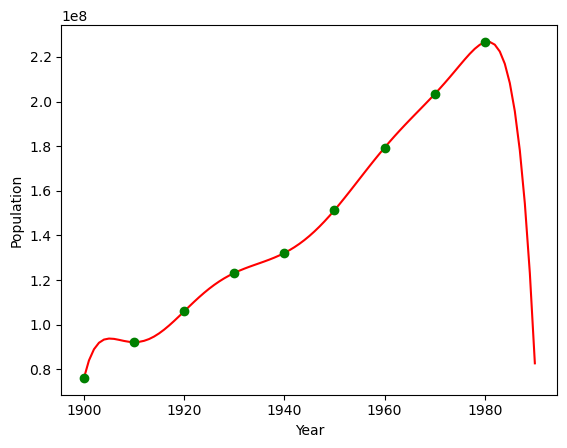

In [25]:
plt.xlabel("Year")
plt.ylabel("Population")
plt.plot(annual_points, result, color="red", zorder=1)
plt.scatter(points, y, color="green", zorder=2)
plt.show()

**Wyk. 4** - wielomian interpolacyjny wyliczony na podstawie baz Newtona z zaznaczonymi węzłami interpolacji

## Zaokrąglenie do miliona

Ponownie wykorzystanie baz jednomianowych, jednak tym razem wartości populacji zostały zaokrąglone do milionów.

In [26]:
rounded = round(y, -6)
print("Population rounded to millions:")
print(*(f"{points[i]}: {rounded[i]}" for i in range(len(points))), sep="\n")

Population rounded to millions:
1900: 76000000
1910: 92000000
1920: 106000000
1930: 123000000
1940: 132000000
1950: 151000000
1960: 179000000
1970: 203000000
1980: 227000000


**Tab. 5** - wartości populacji zaokrąglone do miliona w latach 1900 - 1980.

In [27]:
coef_round = np.linalg.solve(matrix_4, rounded)

Wyliczenie wielomianu interpolacji z równania $(1)$ z pomocą macierzy o najlepszym uwarunkowaniu, funkcja zdefiniowana w sekcji **Bazy jednomianowe**.

In [28]:
result = [p_monomial(t, coef_round) for t in annual_points]
print("Population calculated from interpolation polynomial:")
print(*(f"{annual_points[i]}: {result[i]}" for i in range(len(annual_points))), sep="\n")

Population calculated from interpolation polynomial:
1900: 76000000.0
1901: 83486152.61332807
1902: 88295928.83200002
1903: 91131993.71207802
1904: 92571044.35199997
1905: 93079620.36132808
1906: 93028562.43199995
1907: 92706190.8270781
1908: 92330273.79199997
1909: 92058854.08332808
1910: 91999999.99999997
1911: 92220545.4920781
1912: 92753882.11199997
1913: 93606863.7633281
1914: 94765883.39199999
1915: 96202178.95507812
1916: 97876424.192
1917: 99742657.91332811
1918: 101751603.71199998
1919: 103853430.19207811
1920: 105999999.99999999
1921: 108146654.13332811
1922: 110253576.19199999
1923: 112286779.42707811
1924: 114218757.63199998
1925: 116028839.11132811
1926: 117703281.152
1927: 119235140.61207812
1928: 120623954.43199998
1929: 121875262.06332812
1930: 122999999.99999999
1931: 124013796.78707811
1932: 124936195.07199998
1933: 125789825.45332812
1934: 126599555.07199998
1935: 127391632.08007811
1936: 128192845.31199998
1937: 129029716.6733281
1938: 129927741.95199998
1939: 13091

**Tab. 6** - Populacja w latach 1900 - 1990 wyliczona na podstawie wielomianu interpolacyjnego z bazami jednomianowymi po zaokrągleniu odciętych węzłów interpolacji do miliona.

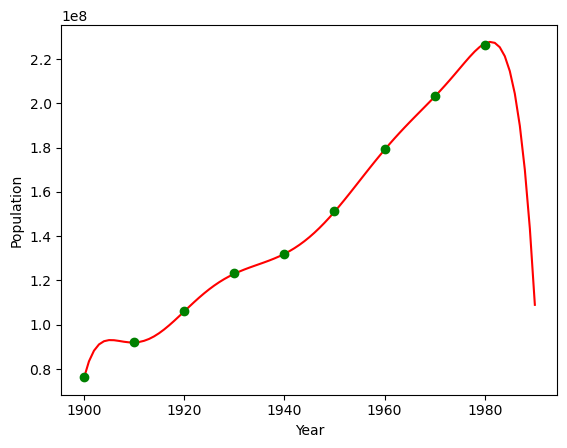

In [29]:
plt.xlabel("Year")
plt.ylabel("Population")
plt.plot(annual_points, result, color="red", zorder=1)
plt.scatter(points, y, color="green", zorder=2)
plt.show()

**Wyk. 5** - wielomian interpolacyjny wyliczony na podstawie baz jednomianowych po zaokrągleniu odciętych do miliona z zaznaczonymi węzłami interpolacji

In [30]:
print("Coefficient for monomial basis:")
print(*(f"x^{i}: {coef_mono[i]}" for i in range(len(points))), sep="\n")

Coefficient for monomial basis:
x^0: 132164569.0
x^1: 46130765.57619044
x^2: 102716314.78571421
x^3: 182527130.1777784
x^4: -374614714.8888876
x^5: -342668455.8222238
x^6: 606291249.7777747
x^7: 189175575.56825495
x^8: -315180235.1746013


**Tab. 7** - wartości współczynników dla baz jednomianowych.

In [31]:
print("Coefficient for rounded monomial basis:")
print(*(f"x^{i}: {coef_round[i]}" for i in range(len(points))), sep="\n")

Coefficient for rounded monomial basis:
x^0: 131999999.99999997
x^1: 45957142.85714272
x^2: 100141269.84126967
x^3: 181111111.11111188
x^4: -356755555.5555542
x^5: -338488888.88889045
x^6: 570311111.1111082
x^7: 186920634.92063585
x^8: -294196825.39682364


**Tab. 8** - wartości współczynników dla baz jednomianowych z zaokrągleniem wartości populacji do miliona.

In [32]:
coef_diff = abs((coef_mono - coef_round) / coef_mono) * 100
print("Rounded coefficient relative difference:")
print(*(f"x^{i}: {round(coef_diff[i], 3)}" for i in range(len(points))), sep="\n")

Rounded coefficient relative difference:
x^0: 0.125
x^1: 0.376
x^2: 2.507
x^3: 0.776
x^4: 4.767
x^5: 1.22
x^6: 5.934
x^7: 1.192
x^8: 6.658


**Tab. 9** - procentowy różnice między współczynnikami z **Tab. 7** oraz **Tab. 8**

Współczynniki uzyskane po zaokrągleniu wartości mają mniejszy moduł niż współczynniki uzyskane za pomocą dokładnych wartości. Dane są bardziej ogólny, przez co wielomian interpolacyjny jest mniej dokładny.

### Ekstrapolacja do roku 1990

In [33]:
extrapolated_population = result[-1]
relative_population_error = (abs(actual_population - extrapolated_population) / actual_population) * 100
print("Relative error of extrapolated population:", relative_population_error)

Relative error of extrapolated population: 56.17383472347983


Ekstrapolowana populacja w roku 1990 na podstawie wielomianu interpolacyjnego: $109000000$  
Rzeczywista populacja w roku 1990: $248709873$  
Błąd względny ekstrapolacji wynosi $53.17\%$

# Wnioski

- Wszystkie 3 metody interpolacji dały wielomiany o bardzo zbliżonych wartościach.
- W przypadku mekstrapolacji roku 1990 z wielomianu wystąpił bardzo duży błąd wynoszący $63.73\%$, co może świadczyć o tym, że wielomiany interpolacyjne nie nadają się do przewidywania wartości dla punktów spoza zakrezu węzłów.
- Po zaokrągleniu danych populacji do miliona współczynniki wielomianu interpolacyjnego miały mniejsze moduły. Wielomian na zaokrąglonych danych jest mniej dokładny, co można zauważyć też na wykresie.
- Błąd ekstrapolacji na rok 1990 po zaokrągleniu do miliona wynosi $53.17\%$, co podtrzymuje tezę, że wielomiany interpolacyjne nie nadają się do ekstrapolacji.